In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd "/content/drive/MyDrive/Octavo Semestre/Bloque PETER BENJI/tomatos"
!ls

/content/drive/MyDrive/Octavo Semestre/Bloque PETER BENJI/tomatos
Tomato	Tomato_Test


In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Found 1920 images belonging to 3 classes.
Found 480 images belonging to 3 classes.


<Figure size 640x480 with 0 Axes>

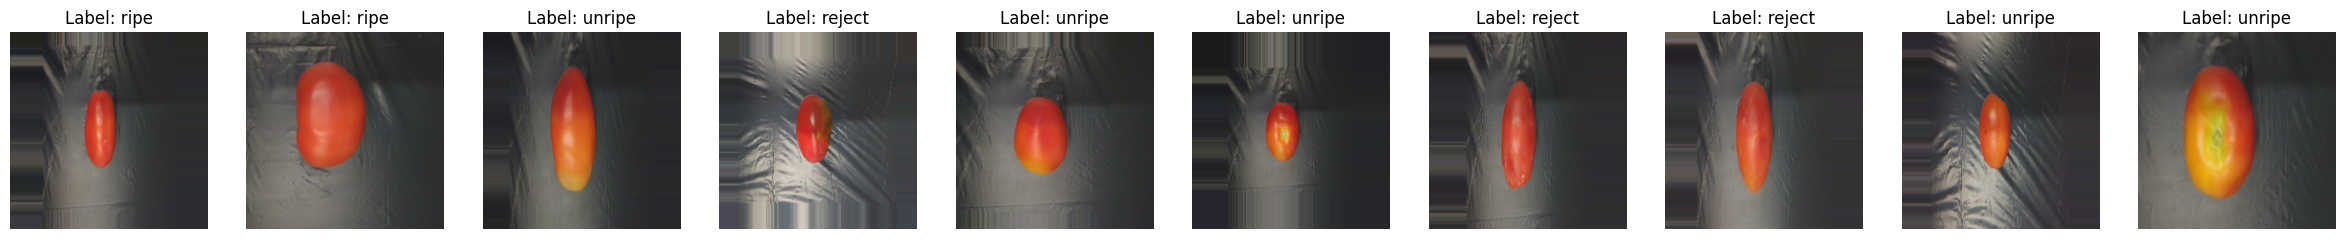

In [18]:
train_dir = 'Tomato'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.6
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True,
)

validation_dir = 'Tomato_Test'

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True,
)

label_categories = {
    0: "reject",
    1: "ripe",
    2: "unripe"
}

images , labels = train_generator[0]

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 10, figsize=(30, 4))

for i in range(10) :
    axarr[i].imshow(images[i])
    label_index = labels[i].argmax()
    axarr[i].axis("off")
    axarr[i].title.set_text(f"Label: {label_categories[label_index]}")

In [24]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer='adam',
						metrics=['acc'])


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 26, 26, 128)      

In [25]:
history = model.fit(
						train_generator,
						epochs = 25)

acc = history.history['acc']
loss = history.history['loss']

Epoch 1/25
30/30 [==============================] - 36s 1s/step - loss: 1.0478 - acc: 0.4938
Epoch 2/25
30/30 [==============================] - 32s 1s/step - loss: 0.5523 - acc: 0.7370
Epoch 3/25
30/30 [==============================] - 33s 1s/step - loss: 0.5221 - acc: 0.7604
Epoch 4/25
30/30 [==============================] - 33s 1s/step - loss: 0.5305 - acc: 0.7646
Epoch 5/25
30/30 [==============================] - 31s 1s/step - loss: 0.5023 - acc: 0.7792
Epoch 6/25
30/30 [==============================] - 32s 1s/step - loss: 0.4808 - acc: 0.7755
Epoch 7/25
30/30 [==============================] - 34s 1s/step - loss: 0.4629 - acc: 0.7964
Epoch 8/25
30/30 [==============================] - 32s 1s/step - loss: 0.4375 - acc: 0.7969
Epoch 9/25
30/30 [==============================] - 32s 1s/step - loss: 0.4215 - acc: 0.8031
Epoch 10/25
30/30 [==============================] - 32s 1s/step - loss: 0.4130 - acc: 0.8141
Epoch 11/25
30/30 [==============================] - 32s 1s/step - lo

<Figure size 640x480 with 0 Axes>

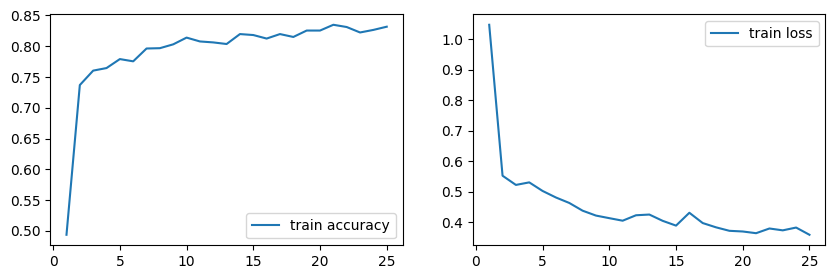

In [26]:
epochs = range(1, len(acc)+1)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2, figsize=(10, 3))
axarr[0].plot(epochs,acc,label='train accuracy')
axarr[0].legend()
axarr[1].plot(epochs,loss,label='train loss')
axarr[1].legend()

In [28]:
test_loss, test_acc = model.evaluate(validation_generator)
print('\ntest acc :\n', test_acc)

predictions = model.predict(validation_generator)
predict_class = (predictions > 0.5).astype("int32")
predict_class.shape

8/8 [==============================] - 195s 28s/step - loss: 0.3843 - acc: 0.8229

test acc :
 0.8229166865348816
8/8 [==============================] - 3s 325ms/step


(480, 3)

In [30]:
model.save("tomatoe.keras")